In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base =  automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date=session.query(measurement.date)[-1][0]
last_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year=dt.datetime.strptime(last_date, "%Y-%m-%d").date() - dt.timedelta(365)
prev_year

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
results_16= session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
results_16_df = pd.DataFrame(results_16).sort_values('date').dropna()
results_16_df.rename(columns={'date': 'Date', 'prcp': 'Precipitation'}, inplace=True)
results_16_df

,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


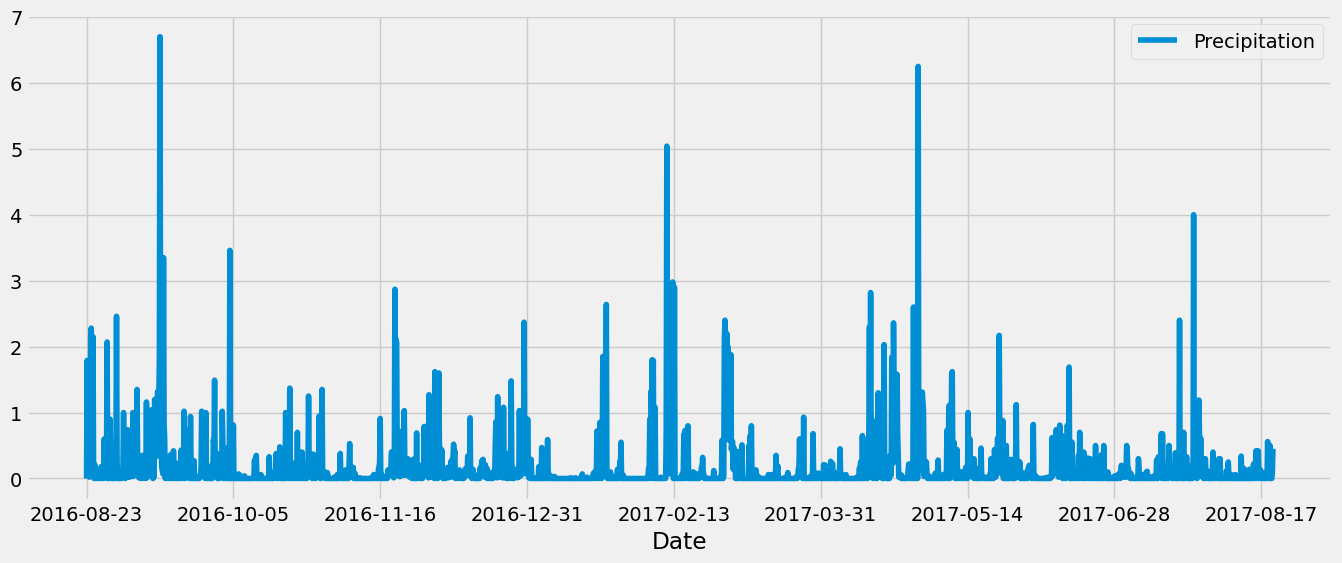

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
results_16_df.plot(x="Date",y='Precipitation', figsize=[15,6])
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = pd.DataFrame(results_16_df['Precipitation'].describe())
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
no_stations = session.query(measurement).group_by(measurement.station).count()
no_stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_count = []

stations_m = session.query(measurement.station.distinct(), func.count(measurement.station)) \
.group_by(measurement.station) \
.order_by(func.count(measurement.station).desc())
for station in stations_m:
    station_count.append(station)

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_list = []
most_active_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)) \
.filter(measurement.station == 'USC00519281')
for temp in most_active_temps:
    active_list.append(temp)
active_list

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_list = []

temp_m =session.query(measurement.tobs) \
.filter(measurement.date >= prev_year) \
.filter(measurement.station =='USC00519281') \
.order_by(measurement.tobs)
for t in temp_m:
    temp_list.append(t)
temp_list_df = pd.DataFrame(temp_list)
temp_list_df.head()

,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


<AxesSubplot:ylabel='Frequency'>

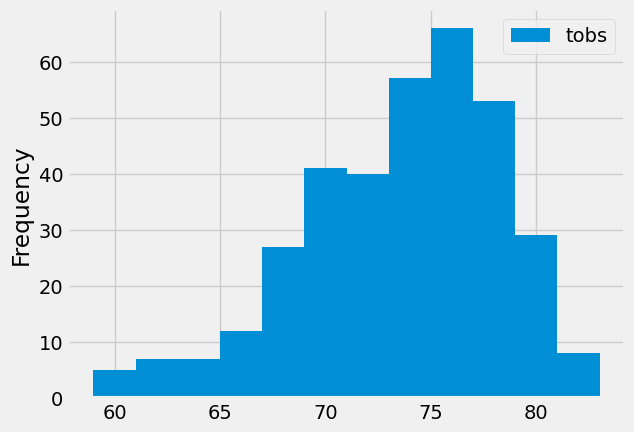

In [19]:
temp_list_df.plot( bins = 12, kind = 'hist')

# Close Session

In [20]:
# Close Session
session.close()